In [76]:
import torch
import torchvision

import numpy as np
import pandas as pd
import sys
import cv2

import torch
import torch.nn.functional as F
import torch.nn.init
from torchvision import transforms
from torch.utils.data import Dataset  
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset, DataLoader
import torchvision.datasets as dsets
import torchvision.transforms as transforms

from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from copy import deepcopy  # 학습동안의 best model의 파라미터값들을 copy해서 저장하기 위함

# np.set_printoptions(threshold=sys.maxsize)
# pd.set_option('display.max_rows', None)

In [78]:
# train_df = pd.read_csv(r'D:\대회\Mnist 손글씨 분류 경진대회\dataset\train\train_data.csv')
# train_dir = r'D:\대회\Mnist 손글씨 분류 경진대회\dataset\train\\'

train_df = pd.read_csv(r'D:\대회\컴퓨터 비전 학습 경진대회(Mnist)\235626_컴퓨터 비전 학습 경진대회_data\train.csv')
print(train_df)

test_df = pd.read_csv(r'D:\대회\컴퓨터 비전 학습 경진대회(Mnist)\235626_컴퓨터 비전 학습 경진대회_data\test.csv')
print(test_df)


        id  digit letter  0  1  2  3  4  5  6  ...  774  775  776  777  778  \
0        1      5      L  1  1  1  4  3  0  0  ...    2    1    0    1    2   
1        2      0      B  0  4  0  0  4  1  1  ...    0    3    0    1    4   
2        3      4      L  1  1  2  2  1  1  1  ...    3    3    3    0    2   
3        4      9      D  1  2  0  2  0  4  0  ...    3    3    2    0    1   
4        5      6      A  3  0  2  4  0  3  0  ...    4    4    3    2    1   
...    ...    ...    ... .. .. .. .. .. .. ..  ...  ...  ...  ...  ...  ...   
2043  2044      6      V  2  4  3  4  2  4  4  ...    0    2    2    0    0   
2044  2045      1      L  3  2  2  1  1  4  0  ...    2    3    4    2    1   
2045  2046      9      A  4  0  4  0  2  4  4  ...    2    3    1    1    3   
2046  2047      0      Z  2  3  3  0  3  0  4  ...    2    3    1    1    0   
2047  2048      5      Z  4  2  2  1  3  0  0  ...    4    2    4    0    4   

      779  780  781  782  783  
0       4    4    4

In [79]:
## 데이터 정리

train_label_df = train_df['digit'].copy().values
train_df_rev = train_df.drop(['id', 'letter', 'digit'], axis = 1).values
print(train_df_rev,'\n')
print(train_label_df,'\n')

test_df_rev = test_df.drop(['id', 'letter'], axis = 1).values
print(test_df_rev)

[[1 1 1 ... 4 3 4]
 [0 4 0 ... 2 1 2]
 [1 1 2 ... 0 2 2]
 ...
 [4 0 4 ... 2 0 0]
 [2 3 3 ... 4 3 1]
 [4 2 2 ... 4 3 4]] 

[5 0 4 ... 9 0 5] 

[[0 4 0 ... 4 1 4]
 [4 1 4 ... 2 1 2]
 [0 4 0 ... 0 1 4]
 ...
 [4 2 1 ... 3 1 1]
 [1 1 2 ... 4 4 2]
 [2 1 0 ... 2 2 0]]


In [80]:
print(train_df_rev.shape)
print(type(train_df_rev.shape))

(2048, 784)
<class 'tuple'>


In [81]:
## 이미지 확인해보기

print(train_df_rev.reshape(-1,28,28).shape)

train_df_rev.reshape(-1, 28,28)
test_df_rev.reshape(-1, 28,28)

(2048, 28, 28)


array([[[0, 4, 0, ..., 2, 4, 1],
        [0, 1, 2, ..., 4, 0, 2],
        [1, 2, 4, ..., 2, 4, 0],
        ...,
        [1, 0, 1, ..., 4, 0, 0],
        [4, 3, 2, ..., 1, 2, 4],
        [1, 2, 0, ..., 4, 1, 4]],

       [[4, 1, 4, ..., 0, 2, 4],
        [4, 2, 1, ..., 4, 1, 4],
        [1, 2, 4, ..., 4, 4, 3],
        ...,
        [2, 4, 4, ..., 0, 2, 3],
        [1, 4, 3, ..., 4, 1, 1],
        [3, 3, 2, ..., 2, 1, 2]],

       [[0, 4, 0, ..., 0, 3, 2],
        [0, 4, 1, ..., 4, 0, 0],
        [1, 1, 3, ..., 1, 0, 4],
        ...,
        [2, 4, 4, ..., 1, 0, 1],
        [4, 0, 4, ..., 4, 1, 2],
        [0, 2, 2, ..., 0, 1, 4]],

       ...,

       [[4, 2, 1, ..., 3, 4, 1],
        [2, 0, 1, ..., 1, 2, 1],
        [4, 1, 0, ..., 2, 1, 3],
        ...,
        [2, 1, 3, ..., 4, 4, 1],
        [1, 0, 3, ..., 3, 2, 4],
        [2, 0, 4, ..., 3, 1, 1]],

       [[1, 1, 2, ..., 3, 4, 1],
        [0, 0, 1, ..., 1, 2, 1],
        [1, 0, 0, ..., 3, 0, 1],
        ...,
        [0, 0, 3, ..., 

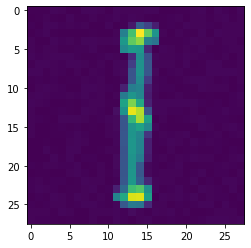

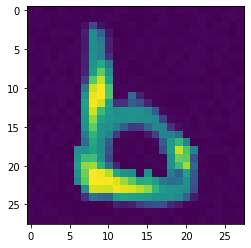

In [51]:
## 이미지 확인해보기

plt.imshow(train_df_rev.reshape(-1, 28,28)[0])
plt.show()

plt.imshow(train_df_rev.reshape(-1, 28,28)[1])
plt.show()

In [83]:



# train_df = pd.read_csv(r'D:\대회\컴퓨터 비전 학습 경진대회(Mnist)\235626_컴퓨터 비전 학습 경진대회_data\train.csv')
# train_dir = r'D:\대회\컴퓨터 비전 학습 경진대회(Mnist)\235626_컴퓨터 비전 학습 경진대회_data\\'
# train_file_path = train_dir + train_df['file_name']

    
def dataset_raw (image):
    
#     image = Image.open(path) 
    image_array = np.array(image).reshape(28,28)
    image_array = cv2.bilateralFilter(image_array, -1, 10, 5)
    image_array = np.array(image_array).reshape(1,28,28)#.reshape(784)
    return image_array

def dataset_rotation (image):
    
#     r = np.random.randint(0,40)
    rotation = transforms.RandomRotation((-40,40))
    image = Image.fromarray(image)  ## numpy를 PIL image로 변환 ,  https://www.delftstack.com/ko/howto/matplotlib/convert-a-numpy-array-to-pil-image-python/
    image = rotation(image)
    image_array = np.array(image).reshape(28,28)
    image_array = cv2.bilateralFilter(image_array, -1, 10, 5)
    image_array = np.array(image_array).reshape(1,28,28)#.reshape(784)
    return image_array  

    
# def dataset_rotation30 (path):
    
#     rotation30 = transforms.RandomRotation(30)
#     image = Image.open(path)
#     image = rotation30(image)
#     image_array = np.array(image).reshape(28,28)
#     image_array = cv2.bilateralFilter(image_array, -1, 10, 5)
#     image_array = np.array(image_array).reshape(28,28)#.reshape(784)
#     return image_array

# def dataset_rotation40 (path):
    
#     rotation30 = transforms.RandomRotation(30)
#     image = Image.open(path)
#     image = rotation30(image)
#     image_array = np.array(image).reshape(28,28)
#     image_array = cv2.bilateralFilter(image_array, -1, 10, 5)
    image_array = np.array(image_array).reshape(1,28,28)#.reshape(784)
#     return image_array


def dataset_crop (image):
    
    crop = transforms.CenterCrop(12)
    image = Image.fromarray(image)
    image = crop(image)
    image_array = np.array(image).reshape(28,28)
    image_array = cv2.bilateralFilter(image_array, -1, 10, 5)
    image_array = np.array(image_array).reshape(1,28,28)#.reshape(784)
    return image_array


def dataset_erase (image):
    
    erase = transforms.Compose([transforms.PILToTensor(),transforms.RandomErasing(0.5),transforms.ToPILImage() ])
    image = Image.fromarray(image)
    image = erase(image)
    image_array = np.array(image).reshape(28,28)
    image_array = cv2.bilateralFilter(image_array, -1, 10, 5)
    image_array = np.array(image_array).reshape(1,28,28)#.reshape(784)
    return image_array

# train_label = np.array(pd.get_dummies(train_df['label']))
train_label = np.array(train_label_df)
print(len(train_label))

train_np = np.array(train_df_rev , dtype='float32')


train_data_raw = np.apply_along_axis(dataset_raw, 1, train_np)
train_data_r1 = np.apply_along_axis(dataset_rotation, 1, train_np)
train_data_r2 = np.apply_along_axis(dataset_rotation, 1, train_np)
# train_data_r30 = np.array(list(train_file_path.apply(dataset_rotation30)), dtype='float32')
# train_data_r40 = np.array(list(train_file_path.apply(dataset_rotation40)), dtype='float32')
# train_data_crop = np.array(list(train_file_path.apply(dataset_crop)), dtype='float32')
train_data_erase = np.apply_along_axis(dataset_erase, 1, train_np)


train_data = np.vstack([train_data_raw, train_data_r1, train_data_r2, train_data_erase]) 
train_label = np.hstack([train_label, train_label, train_label, train_label]) 
print(len(train_label))
print(len(train_label))




2048
8192
8192


In [84]:
x_train, x_val, y_train, y_val = train_test_split(train_data, train_label, test_size = 1/10, random_state=0)



In [85]:
class CustomDataset(Dataset): 
    def __init__(self,x_data, y_data = None ):
        self.x_data = x_data
        self.y_data = y_data

  # 총 데이터의 개수를 리턴
    def __len__(self): 
        return len(self.x_data)

  # 인덱스를 입력받아 그에 맵핑되는 입출력 데이터를 파이토치의 Tensor 형태로 리턴
    def __getitem__(self, idx): 
        x = torch.FloatTensor(self.x_data[idx])
        
        if self.y_data is not None: # 라벨이 존재 하는경우: 학습에 이용할경우

            y = self.y_data[idx] # 해당 인덱스에 맞는 라벨 추출

            return x, y  # 1차원으로 변환한 이미지와 라벨을 return

        return x # test단계에선 label이 존재하지 않기때문에 image만을 return
        

dataset = CustomDataset(x_train, y_train) 

# validset = CustomDataset(x_val, y_val)


# dataset =  TensorDataset(x_train, y_train)

data_loader = DataLoader(dataset, batch_size=20, shuffle=True, drop_last = True)

print(dataset.__len__())
print(dataset.__getitem__(1))
# print(dataset.__getitem__(1)[0].shape)

# print(x_train.shape)
# print(y_train.shape)

# print(len(x_train))
# print(len(y_train))


for data, label in data_loader:
    print(data, label)

7372
(tensor([[[253., 253., 253., 253.,   0.,   0., 253., 253.,   0., 253., 253.,
          253., 253., 253., 253.,   1., 253., 253., 253., 253., 253., 253.,
          253.,   0., 253., 253., 254., 254.],
         [253., 253., 253.,   0., 253., 253., 253., 253., 253., 253.,   0.,
          253.,   0., 253., 253., 253.,   1., 253., 253.,   0., 253., 253.,
          253., 253.,   0.,   0., 253., 254.],
         [253., 253., 253., 253.,   0.,   0., 253., 253., 253., 253., 253.,
          253., 253., 253., 253., 252., 249., 247., 253.,   1., 253., 253.,
          253., 253., 253., 253., 253., 254.],
         [253., 253.,   0., 253., 253., 253., 253., 253.,   0., 253.,   0.,
          253., 253., 253., 253., 208., 112., 115., 185., 253., 253., 253.,
          253., 253., 253., 253., 253., 253.],
         [253., 253., 253., 253.,   0., 253., 253.,   0., 253.,   0., 253.,
          253., 253., 253., 253., 182.,  58.,  59., 157., 251., 253., 253.,
          253., 253.,   0.,   0., 253., 253.],

          [  0.0000,   0.0000,   0.0000,  ...,   0.0000,   0.0000,   0.0000]]]]) tensor([3, 4, 2, 9, 0, 1, 4, 5, 7, 4, 0, 6, 8, 4, 8, 7, 0, 0, 2, 6])
tensor([[[[  0.0000,   0.0000,   0.0000,  ...,   0.0000,   0.0000,   0.0000],
          [  0.0000,   0.0000,   0.0000,  ...,   0.0000,   0.0000,   0.0000],
          [  0.0000,   0.0000,   0.0000,  ...,   0.0000,   0.0000,   0.0000],
          ...,
          [  0.0000,   0.0000,   0.0000,  ...,   0.0000,   0.0000,   0.0000],
          [  0.0000,   0.0000,   0.0000,  ...,   0.0000,   0.0000,   0.0000],
          [  0.0000,   0.0000,   0.0000,  ...,   0.0000,   0.0000,   0.0000]]],


        [[[  0.0000,   0.0000,   0.0000,  ...,   0.0000,   0.0000,   0.0000],
          [  0.0000,   0.0000,   0.0000,  ...,   0.0000,   0.0000,   0.0000],
          [  0.0000,   0.0000,   0.0000,  ...,   0.0000,   0.0000,   0.0000],
          ...,
          [  0.0000,   0.0000,   0.0000,  ...,   0.0000,   0.0000,   0.0000],
          [  0.0000,   0.0000,   0.0

          [  1.7373,   1.8016,   1.7776,  ...,   1.9045,   1.9498,   2.0305]]]]) tensor([9, 7, 1, 0, 4, 9, 6, 7, 0, 4, 6, 8, 6, 5, 9, 3, 8, 4, 4, 2])
tensor([[[[253.0000, 253.0000, 253.0000,  ..., 252.0000, 252.0000, 253.0000],
          [253.0000, 253.0000, 253.0000,  ..., 253.0000, 253.0000, 253.0000],
          [253.0000, 253.0000,   0.0000,  ..., 247.0000, 252.0000, 253.0000],
          ...,
          [252.0000, 252.0000, 252.0000,  ..., 254.0000, 254.0000, 254.0000],
          [252.0000, 252.0000,   1.0000,  ..., 254.0000, 254.0000, 254.0000],
          [252.0000,   1.0000, 252.0000,  ..., 254.0000, 254.0000, 254.0000]]],


        [[[  0.0000,   0.0000,   0.0000,  ...,   0.0000,   0.0000,   0.0000],
          [  0.0000,   0.0000,   0.0000,  ...,   0.0000,   0.0000,   0.0000],
          [  0.0000,   0.0000,   0.0000,  ...,   0.0000,   0.0000,   0.0000],
          ...,
          [  0.0000,   0.0000,   0.0000,  ...,   0.0000,   0.0000,   0.0000],
          [  0.0000,   0.0000,   0.0

          [  2.5082,   2.5442,   2.2974,  ...,   2.1826,   2.2245,   2.0720]]]]) tensor([6, 1, 5, 7, 6, 8, 8, 8, 8, 0, 2, 4, 0, 0, 8, 1, 0, 1, 2, 0])
tensor([[[[253., 253.,   0.,  ..., 253., 253., 253.],
          [253., 253., 253.,  ...,   0., 253., 253.],
          [  0.,   0., 253.,  ...,   0., 253.,   0.],
          ...,
          [253.,   0.,   0.,  ...,   0., 254., 254.],
          [253.,   0., 253.,  ..., 254., 254., 254.],
          [253., 253., 253.,  ..., 254., 254., 254.]]],


        [[[  0.,   0.,   0.,  ...,   0.,   0.,   0.],
          [  0.,   0.,   0.,  ...,   0.,   0.,   0.],
          [  0.,   0.,   0.,  ...,   0.,   0.,   0.],
          ...,
          [  0.,   0.,   0.,  ...,   0.,   0.,   0.],
          [  0.,   0.,   0.,  ...,   0.,   0.,   0.],
          [  0.,   0.,   0.,  ...,   0.,   0.,   0.]]],


        [[[  0.,   0.,   0.,  ...,   0.,   0.,   0.],
          [  0.,   0.,   0.,  ...,   0.,   0.,   0.],
          [  0.,   0.,   0.,  ...,   0.,   0.,   0.],
  

          [  2.2304,   2.1627,   2.1781,  ...,   2.2450,   2.1267,   2.1190]]]]) tensor([9, 6, 8, 8, 9, 2, 9, 9, 7, 0, 8, 2, 5, 8, 6, 7, 3, 5, 4, 5])
tensor([[[[1.9970, 2.0008, 2.0016,  ..., 2.4381, 2.4126, 2.5414],
          [2.0146, 1.9899, 1.9377,  ..., 2.6500, 2.6123, 2.6230],
          [1.9030, 1.9185, 1.9597,  ..., 2.5770, 2.4495, 2.7075],
          ...,
          [3.2672, 3.4384, 3.1620,  ..., 2.0460, 1.9463, 1.9276],
          [3.3481, 3.4948, 3.2341,  ..., 2.0934, 1.9407, 1.8981],
          [3.3085, 3.5046, 3.1992,  ..., 2.0804, 1.8965, 1.8924]]],


        [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],


        [[[2.3651, 2

In [86]:
### 딥한 CNN으로 MNIST 분류   (Early Stop 적용 / Dropout / batchnorm)





device = 'cuda' if torch.cuda.is_available() else 'cpu'

print(device,'로 적용됩니다')

# 랜덤 시드 고정
torch.manual_seed(777)

# GPU 사용 가능일 경우 랜덤 시드 고정
if device == 'cuda':
    torch.cuda.manual_seed_all(777)
    
    
learning_rate = 0.01
training_epochs = 200
batch_size = 100
patience = 20  ## 얼리스탑 인자
trigger_n = 0
lowest_cost = np.inf


# mnist_train = dsets.MNIST(root='MNIST_data/', # 다운로드 경로 지정
#                           train=True, # True를 지정하면 훈련 데이터로 다운로드
#                           transform=transforms.ToTensor(), # 텐서로 변환
#                           download=True)
# 
# mnist_test = dsets.MNIST(root='MNIST_data/', # 다운로드 경로 지정
#                          train=False, # False를 지정하면 테스트 데이터로 다운로드
#                          transform=transforms.ToTensor(), # 텐서로 변환
#                          download=True)
# 
# data_loader = torch.utils.data.DataLoader(dataset=mnist_train,
#                                           batch_size=batch_size,
#                                           shuffle=True,
#                                           drop_last=True)


# CNN 모델 클래스
class CNN(torch.nn.Module):

    def __init__(self):
        super(CNN, self).__init__()
        self.keep_prob = 0.5
        
        # L1 ImgIn shape=(?, 28, 28, 1)
        #    Conv     -> (?, 28, 28, 32)
        #    Pool     -> (?, 14, 14, 32)
        self.layer1 = torch.nn.Sequential(
            torch.nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
            torch.nn.BatchNorm2d(32),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))
        
        # L2 ImgIn shape=(?, 14, 14, 32)
        #    Conv      ->(?, 14, 14, 64)
        #    Pool      ->(?, 7, 7, 64)
        self.layer2 = torch.nn.Sequential(
            torch.nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            torch.nn.BatchNorm2d(64),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))
        
        # L3 ImgIn shape=(?, 7, 7, 64)
        #    Conv      ->(?, 7, 7, 128)
        #    Pool      ->(?, 4, 4, 128)
        self.layer3 = torch.nn.Sequential(
            torch.nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            torch.nn.BatchNorm2d(128),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2, padding=1))

        # L4 FC 4x4x128 inputs -> 625 outputs
        self.fc1 = torch.nn.Linear(4 * 4 * 128, 625, bias=True)
        torch.nn.init.kaiming_normal_( self.fc1.weight, a=0, mode='fan_in', nonlinearity='relu')
#         torch.nn.init.xavier_uniform_(self.fc1.weight)
        self.layer4 = torch.nn.Sequential(
            self.fc1,
            torch.nn.ReLU(),
            torch.nn.BatchNorm1d(625),
            torch.nn.Dropout(p=1 - self.keep_prob))
            
        
        # L5 Final FC 625 inputs -> 10 outputs
        self.fc2 = torch.nn.Linear(625, 10, bias=True)
        torch.nn.init.kaiming_normal_( self.fc2.weight, a=0, mode='fan_in', nonlinearity='relu')
#         torch.nn.init.kaiming_normal_(tensor, a=0, mode='fan_in', nonlinearity='leaky_relu')
        self.layer5 = torch.nn.Sequential(
                    self.fc2,
                    )

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = out.view(out.size(0), -1)   # Flatten them for FC
        out = self.layer4(out)
        out = self.layer5(out)
        return out

    
# CNN 모델 정의
model = CNN().to(device)
    
    
criterion = torch.nn.CrossEntropyLoss().to(device)    # 비용 함수에 소프트맥스 함수 포함되어져 있음.
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)


total_batch = len(data_loader)
print('총 배치의 수 : {}'.format(total_batch))


for epoch in range(training_epochs):
    avg_cost = 0
    
    model.train()

    for X, Y in data_loader: # 미니 배치 단위로 꺼내온다. X는 미니 배치, Y는 레이블.
        # image is already size of (28x28), no reshape
        # label is not one-hot encoded

        X = X.to(device)
        Y = Y.to(device)

        optimizer.zero_grad()
        hypothesis = model(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch
        
    ## Early stopping
    
    current_cost = avg_cost
    
    # best model check
    if current_cost < lowest_cost :
        best_epoch = epoch
        lowest_cost = current_cost
        best_model = deepcopy(model.state_dict())
        trigger_n = 0
        
    else:
        trigger_n += 1
        if trigger_n >= patience:
            print("There is no improvement during last %d epochs." % trigger_n)
            break
#     https://blog.naver.com/1012rnjsdydgns/222458085542 참고



    print('[Epoch: {:>4}] cost = {:>.9}, trigger_n: {}, best_epoch: {}'.format(epoch , avg_cost, trigger_n, best_epoch))    
  

  
# Load best epoch's model
model.load_state_dict(best_model)
  

cuda 로 적용됩니다
총 배치의 수 : 368
[Epoch:    0] cost = 2.81101465, trigger_n: 0, best_epoch: 0
[Epoch:    1] cost = 2.2948823, trigger_n: 0, best_epoch: 1
[Epoch:    2] cost = 2.18231797, trigger_n: 0, best_epoch: 2
[Epoch:    3] cost = 2.07887125, trigger_n: 0, best_epoch: 3
[Epoch:    4] cost = 2.03864789, trigger_n: 0, best_epoch: 4
[Epoch:    5] cost = 2.01095891, trigger_n: 0, best_epoch: 5
[Epoch:    6] cost = 1.93026614, trigger_n: 0, best_epoch: 6
[Epoch:    7] cost = 1.86757421, trigger_n: 0, best_epoch: 7
[Epoch:    8] cost = 1.85717475, trigger_n: 0, best_epoch: 8
[Epoch:    9] cost = 2.06313229, trigger_n: 1, best_epoch: 8
[Epoch:   10] cost = 1.99226356, trigger_n: 2, best_epoch: 8
[Epoch:   11] cost = 2.07077122, trigger_n: 3, best_epoch: 8
[Epoch:   12] cost = 1.98033369, trigger_n: 4, best_epoch: 8
[Epoch:   13] cost = 1.92751634, trigger_n: 5, best_epoch: 8
[Epoch:   14] cost = 1.88743961, trigger_n: 6, best_epoch: 8
[Epoch:   15] cost = 1.85614634, trigger_n: 0, best_epoch: 

[Epoch:  132] cost = 1.21156728, trigger_n: 4, best_epoch: 128
[Epoch:  133] cost = 1.20608008, trigger_n: 5, best_epoch: 128
[Epoch:  134] cost = 1.23452437, trigger_n: 6, best_epoch: 128
[Epoch:  135] cost = 1.20663905, trigger_n: 7, best_epoch: 128
[Epoch:  136] cost = 1.19762468, trigger_n: 8, best_epoch: 128
[Epoch:  137] cost = 1.2247225, trigger_n: 9, best_epoch: 128
[Epoch:  138] cost = 1.30808365, trigger_n: 10, best_epoch: 128
[Epoch:  139] cost = 1.2278595, trigger_n: 11, best_epoch: 128
[Epoch:  140] cost = 1.21570444, trigger_n: 12, best_epoch: 128
[Epoch:  141] cost = 1.20007133, trigger_n: 13, best_epoch: 128
[Epoch:  142] cost = 1.22898459, trigger_n: 14, best_epoch: 128
[Epoch:  143] cost = 1.21054125, trigger_n: 15, best_epoch: 128
[Epoch:  144] cost = 1.19849861, trigger_n: 16, best_epoch: 128
[Epoch:  145] cost = 1.19466186, trigger_n: 17, best_epoch: 128
[Epoch:  146] cost = 1.19221509, trigger_n: 18, best_epoch: 128
[Epoch:  147] cost = 1.2009877, trigger_n: 19, b

<All keys matched successfully>